In [1]:
import pickle as pkl
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

mpl.rcParams['figure.dpi'] = 300

In [2]:
M_list = [12, 14, 16, 18, 20]

In [3]:
sim = pd.read_csv('cancer_sim.csv', header=None).T
sim.columns = M_list
sim.index = M_list
sim

,12,14,16,18,20
12,0.4218,0.3922,0.3834,0.3652,0.3594
14,0.3992,0.3606,0.3320,0.3222,0.3090
16,0.3648,0.3440,0.3072,0.2876,0.2650
18,0.3468,0.3024,0.2782,0.2528,0.2314
20,0.3274,0.2954,0.2460,0.2338,0.2090


In [4]:
sensei = pd.read_csv('cancer_sensei.csv', header=None).T
sensei.columns = M_list
sensei.index = M_list
sensei

,12,14,16,18,20
12,0.42850,0.40217,0.38169,0.36532,0.35195
14,0.39604,0.36601,0.34259,0.32385,0.30853
16,0.37044,0.33742,0.31167,0.29106,0.27424
18,0.34975,0.31431,0.28668,0.26462,0.24663
20,0.33272,0.29528,0.26614,0.24291,0.22404


In [5]:
baseline = pd.read_csv('cancer_baseline.csv', header=None).T
baseline.columns = M_list
baseline.index = M_list
baseline

,12,14,16,18,20
12,0.40301,0.37649,0.35596,0.33962,0.32631
14,0.36983,0.33980,0.31651,0.29797,0.28288
16,0.34379,0.31097,0.28554,0.26532,0.24890
18,0.32284,0.28778,0.26068,0.23918,0.22177
20,0.30566,0.26879,0.24036,0.21788,0.19974


In [6]:
(sim - sensei).apply(lambda x: x ** 2).mean().mean() ** .5

0.008687392243936028

In [7]:
(sim - baseline).apply(lambda x: x ** 2).mean().mean() ** .5

0.021530013097998804

In [10]:
((sim - sensei).abs() / sim).apply(lambda x: x ** 2).mean().mean() ** .5

0.0332225196185902

In [11]:
((sim - baseline).abs() / sim).apply(lambda x: x ** 2).mean().mean() ** .5

0.06583994971252059

In [8]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

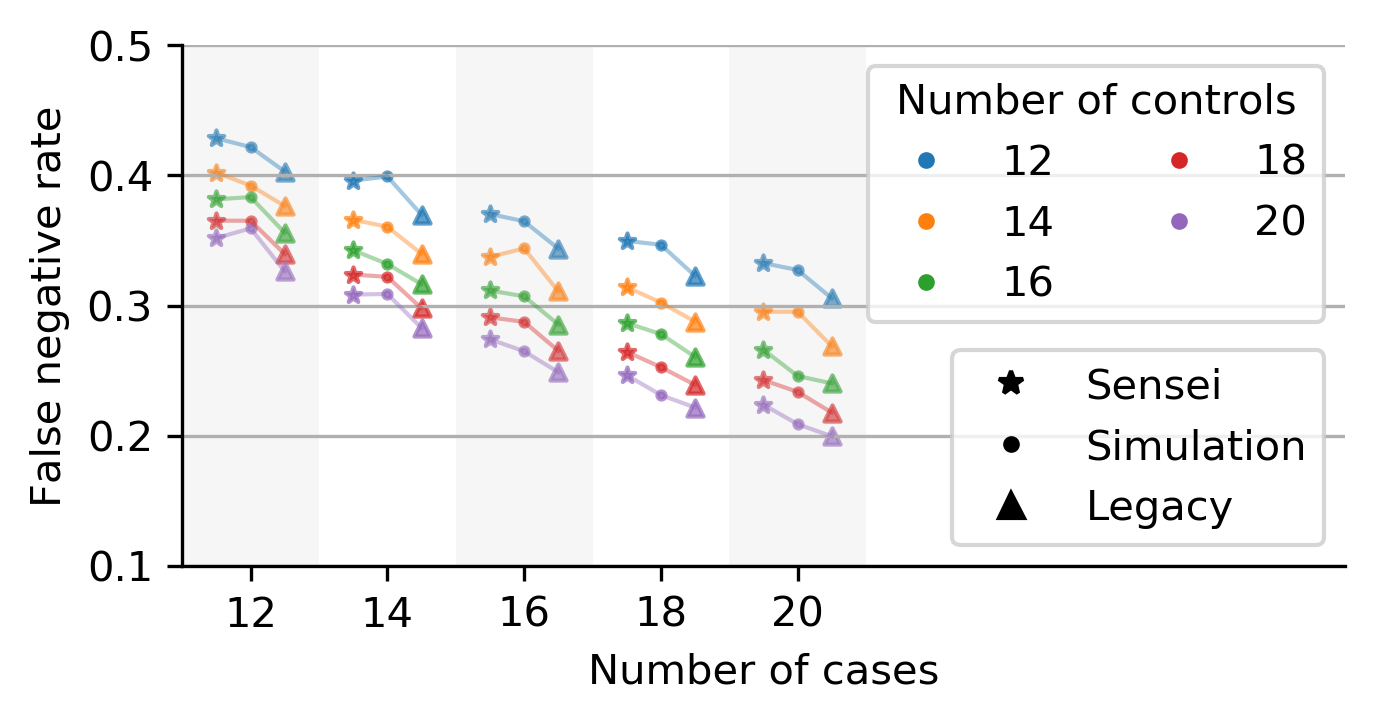

In [9]:
markersize = 15

color_map = {
 12: colors[0],
 14: colors[1],
 16: colors[2],
 18: colors[3],
 20: colors[4]
}

fig = plt.figure(figsize=(5, 2.3))
ax = fig.add_subplot(1, 1, 1)

for i in M_list:
    for j in M_list:
        x = [i - 0.5, i + 0.0, i + 0.5]
        y = [sensei.loc[i, j], sim.loc[i, j], baseline.loc[i, j]]
        ax.plot(x, y, lw=1, c=color_map[j], alpha=0.4)
        ax.scatter(x[0], y[0], marker='*', color=color_map[j], s=markersize, alpha=0.7)
        ax.scatter(x[1], y[1], marker='.', color=color_map[j], s=markersize, alpha=0.7)
        ax.scatter(x[2], y[2], marker='^', color=color_map[j], s=markersize, alpha=0.7)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

current_ylim = ax.get_ylim()
for v in range(12, 21):
    if v % 4 == 0:
        ax.fill_between([v - 1, v + 1], 0, 1, facecolor='lightgray', alpha=0.2)

ax.set_ylim([0.1, 0.5])
ax.set_xticks(M_list)
ax.tick_params(axis='x', which = 'both', labelbottom=None)
ax.set_ylabel('False negative rate')
ax.set_xlabel('Number of cases')
ax.set_xlim(11, 28)
    
# Ticks
ax.tick_params(axis='x', which = 'both', labelbottom=True)
#ax.set_xticks(list(i + 0.5 for i in list(x_map.values())))
#ax.set_xticklabels(list(cell_types_cosmetic_dict_short[i] for i in list(x_map.keys())), rotation=30, ha='right')

legend_elements = [mpl.lines.Line2D([0], [0], marker='.', color=color_map[i], linestyle="None", label=i) for i in color_map]

leg1 = ax.legend(handles=legend_elements, loc='upper right', title = 'Number of controls', ncol=2)

legend_elements = [mpl.lines.Line2D([0], [0], marker='*', color='k', linestyle="None", label='Sensei'),
                   mpl.lines.Line2D([0], [0], marker='.', color='k', linestyle="None", label='Simulation'),
                   mpl.lines.Line2D([0], [0], marker='^', color='k', linestyle="None", label='Legacy')]

ax.legend(handles=legend_elements, loc='lower right')
ax.add_artist(leg1)


ax.grid(axis='y', which='both')